# Ejemplo PCA Iris Dataset

## Inicializamos las librerías

In [1]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

#### Librerías de sklearn para este problema

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Cargamos el dataset Iris

In [3]:
iris= datasets.load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

#### Iris viene como un diccionario, por lo que vamos a extraer la información que nos interesa para montar nuestro dataset

In [5]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

#### A continucación, vamos a modificar el valor numérico del target por sus valores categóricos

In [6]:
df["target_cat"] = np.where(df["target"] == 0, "setosa",np.where(df["target"] == 1, "versicolor","virginica"))

#### Inspeccionemos un poco el dataset

In [7]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_cat  
0     0.0     setosa  
1     0.0     setosa  
2     0.0     setosa  
3     0.0     setosa  
4     0.0     setosa

In [8]:
df.target_cat.value_counts()

setosa        50
versicolor    50
virginica     50
Name: target_cat, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
 5   target_cat         150 non-null    object 
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


In [10]:
df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

Text(0, 0.5, 'sepal width (cm)')

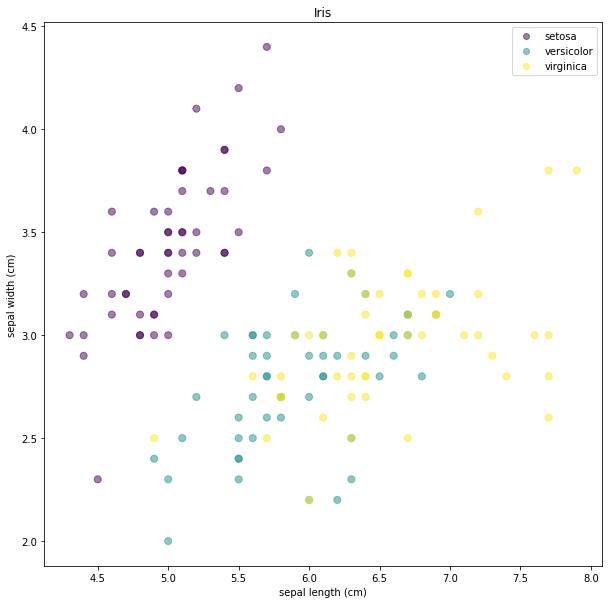

In [11]:
fig = plt.figure(figsize = (10,10))
plt.axis("on")
plt.clf()
scatter = plt.scatter(df["sepal length (cm)"], df["sepal width (cm)"], marker = "o", s = 50, c = df["target"].tolist(), alpha = 0.5, cmap = "viridis")
plt.legend(handles=scatter.legend_elements()[0], labels=df.target_cat.unique().tolist())
plt.title("Iris")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

/var/folders/jm/_cqzmbbs0jv4bdms06q4tfdh0000gn/T/ipykernel_56131/3081991489.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


Text(0.5, 0, 'petal length (cm)')

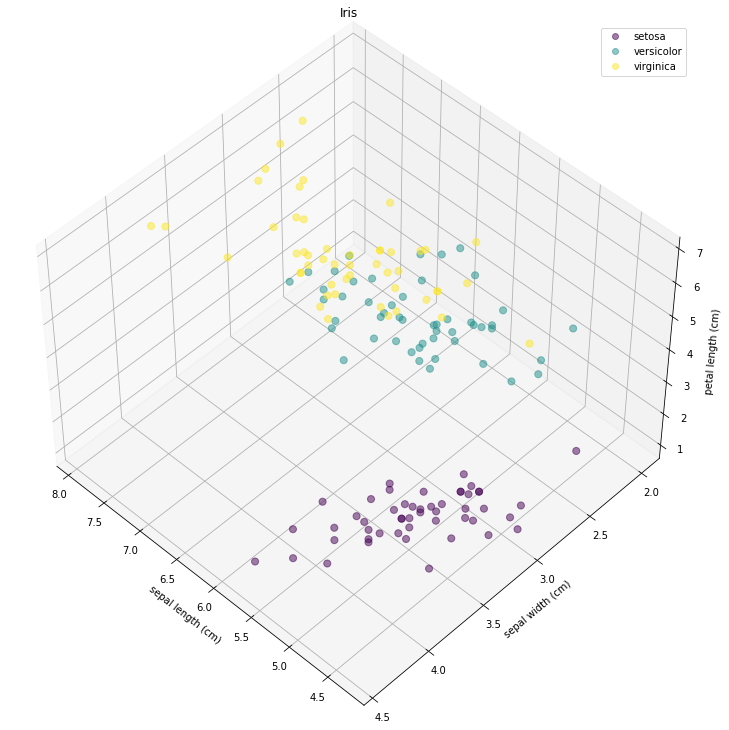

In [12]:
fig = plt.figure(figsize = (10,10))
plt.axis("on")
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
scatter = ax.scatter3D(df["sepal length (cm)"], df["sepal width (cm)"], df["petal length (cm)"], marker = "o", s = 50, c = df["target"].tolist(), alpha = 0.5, cmap = "viridis")
plt.legend(handles=scatter.legend_elements()[0], labels=df.target_cat.unique().tolist())
ax.set_title("Iris")
ax.set_xlabel("sepal length (cm)")
ax.set_ylabel("sepal width (cm)")
ax.set_zlabel("petal length (cm)")

## PCA

### Vamos primero a normalizar los datos (media 0 y desviación típica 1)

In [13]:
scaler = StandardScaler()

In [14]:
df_norm = df.copy()

In [15]:
df_norm[iris["feature_names"]] = scaler.fit_transform(df_norm[iris["feature_names"]])

In [16]:
df_norm.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

   target target_cat  
0     0.0     setosa  
1     0.0     setosa  
2     0.0     setosa  
3     0.0     setosa  
4     0.0     setosa

### Vamos a quedarnos con las dos componentes que maximicen la ganancia

In [17]:
pca = PCA(n_components = 2, random_state = 42)

In [18]:
pca_2 = pca.fit_transform(df_norm[iris["feature_names"]])

In [19]:
df_pca = pd.DataFrame({"pc1":pca_2[:,0], "pc2":pca_2[:,1], "target": df_norm["target"], "target_cat": df_norm["target_cat"]})

In [20]:
df_pca.head()

pc1       pc2  target target_cat
0 -2.264703  0.480027     0.0     setosa
1 -2.080961 -0.674134     0.0     setosa
2 -2.364229 -0.341908     0.0     setosa
3 -2.299384 -0.597395     0.0     setosa
4 -2.389842  0.646835     0.0     setosa

#### Vamos a ver el ratio de la varianza explicada para cada una de las dos variables

In [21]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [22]:
pca.explained_variance_ratio_.sum()

0.9581320720000164

Esto significa que estas dos variables explican el 95,8% del total de las variables iniciales.

<BarContainer object of 2 artists>

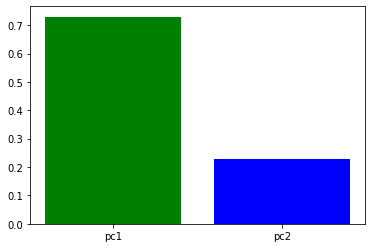

In [23]:
plt.bar(["pc1", "pc2"], pca.explained_variance_ratio_, color = ["green", "blue"])

#### A continucación, visualizamos nuestras componentes.

Text(0, 0.5, '2º autovector pc2')

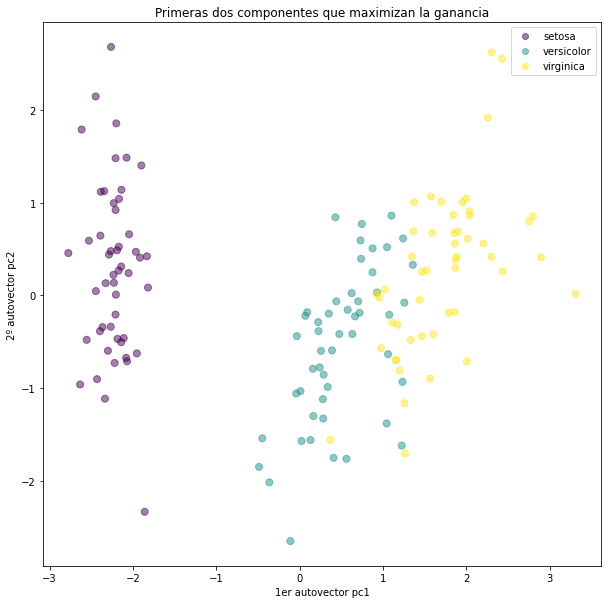

In [24]:
fig = plt.figure(figsize = (10,10))
plt.axis("on")
plt.clf()
scatter = plt.scatter(df_pca["pc1"], df_pca["pc2"], marker = "o", s = 50, c = df_pca["target"].tolist(), alpha = 0.5, cmap = "viridis")
plt.legend(handles=scatter.legend_elements()[0], labels=df_pca.target_cat.unique().tolist())
plt.title("Primeras dos componentes que maximizan la ganancia")
plt.xlabel("1er autovector pc1")
plt.ylabel("2º autovector pc2")

### Repetimos el proceso, pero ahora vamos a quedarnos con las tres componentes principales

In [25]:
pca = PCA(n_components = 3, random_state = 42)

In [26]:
pca_3 = pca.fit_transform(df_norm[iris["feature_names"]])

In [27]:
df_pca = pd.DataFrame({"pc1":pca_3[:,0], "pc2":pca_3[:,1], "pc3":pca_3[:,2], "target": df_norm["target"], "target_cat": df_norm["target_cat"]})

In [28]:
df_pca.head()

pc1       pc2       pc3  target target_cat
0 -2.264703  0.480027 -0.127706     0.0     setosa
1 -2.080961 -0.674134 -0.234609     0.0     setosa
2 -2.364229 -0.341908  0.044201     0.0     setosa
3 -2.299384 -0.597395  0.091290     0.0     setosa
4 -2.389842  0.646835  0.015738     0.0     setosa

#### Vamos a ver el ratio de la varianza explicada para cada una de las dos variables

In [29]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

In [30]:
pca.explained_variance_ratio_.sum()

0.9948212908928451

Esto significa que estas dos variables explican el 99,48% del total de las variables iniciales.

<BarContainer object of 3 artists>

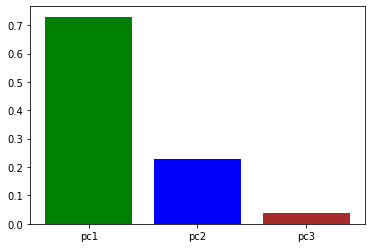

In [31]:
plt.bar(["pc1", "pc2", "pc3"], pca.explained_variance_ratio_, color = ["green", "blue", "brown"])

#### A continucación, visualizamos nuestras componentes.

/var/folders/jm/_cqzmbbs0jv4bdms06q4tfdh0000gn/T/ipykernel_56131/1508894064.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


Text(0.5, 0, '3er autovector pc2')

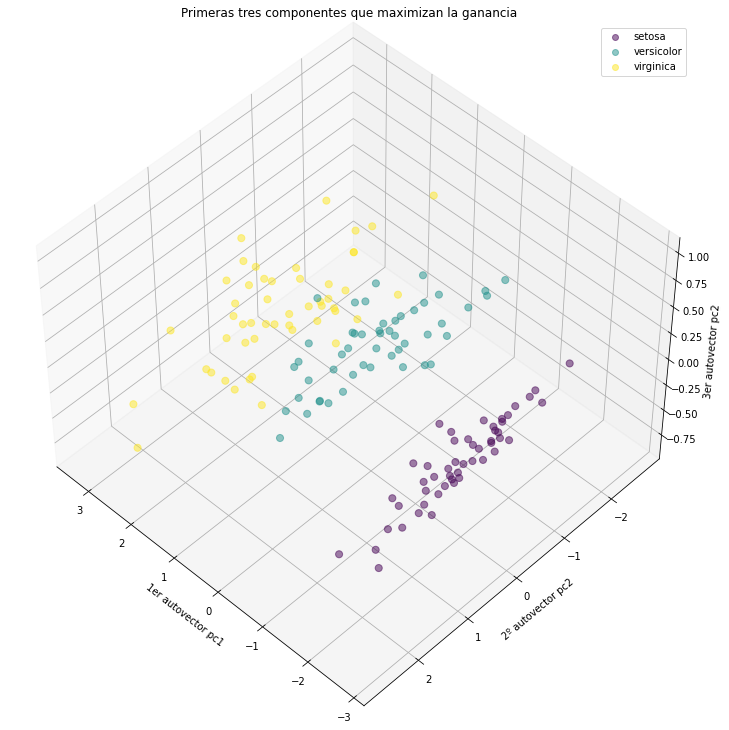

In [32]:
fig = plt.figure(figsize = (10,10))
plt.axis("on")
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
scatter = ax.scatter3D(df_pca["pc1"], df_pca["pc2"], df_pca["pc3"], marker = "o", s = 50, c = df_pca["target"].tolist(), alpha = 0.5, cmap = "viridis")
plt.legend(handles=scatter.legend_elements()[0], labels=df_pca.target_cat.unique().tolist())
ax.set_title("Primeras tres componentes que maximizan la ganancia")
ax.set_xlabel("1er autovector pc1")
ax.set_ylabel("2º autovector pc2")
ax.set_zlabel("3er autovector pc2")


In [33]:
fig = plt.figure(figsize = (15,15))
fig = px.scatter_3d(x = df_pca["pc1"],y = df_pca["pc2"], z = df_pca["pc3"], color=df_pca["target_cat"])
fig.update_layout(title='Primeras tres componentes que maximizan la ganancia', autosize=False,

                  width=800, height=800,
                  showlegend= True,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

<Figure size 1080x1080 with 0 Axes>